[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW1.ipynb)


**Problem 1**. Give an example of a variable that is (a) categorical; (b) quantitative; (c) discrete; (d) continuous.



**Problem 1 Answer:**
(a) gender; (b) the height of buildings; (c) the number of students in a class; (d) distance

**Problem 2**. Analyze the Carbon_West data file using the following code.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
carbon_west = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Carbon_West.dat")


Part a. Construct a histogram of CO2 emissions.

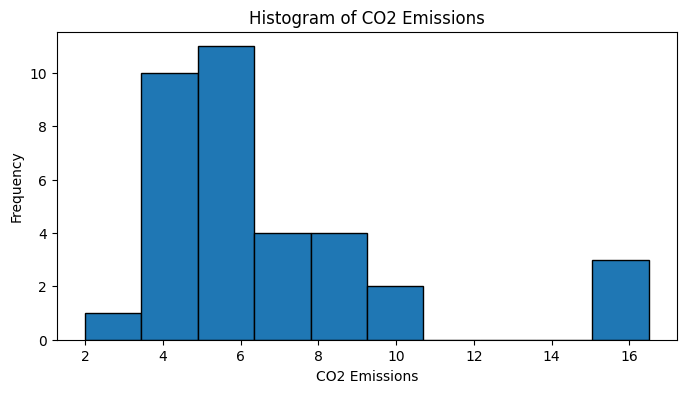

In [3]:
plt.figure(figsize=(8, 4))
plt.hist(carbon_west["CO2"], bins=10, edgecolor='black')
plt.title(f'Histogram of CO2 Emissions')
plt.xlabel("CO2 Emissions")
plt.ylabel('Frequency')
plt.show()

Part b. Find the mean, median, and standard deviation.

In [4]:
import numpy as np

# Calculate mean, median, and standard deviation
mean_value = np.mean(carbon_west["CO2"])
median_value = np.median(carbon_west["CO2"])
std_deviation = np.std(carbon_west["CO2"])
#variance = np.var(carbon_west["time"])

# Display the results
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Standard Deviation: {std_deviation}")
#print(f"Variance: {variance}")

Mean: 6.717142857142858
Median: 5.9
Standard Deviation: 3.3086454469884727


**Problem 3**. Read in the murder data set using the following code. The variable murder is the murder rate (per 100,000 population) for each state in the U.S. in 2017 according to the FBI Uniform Crime Reports. At first, do not use the observation for D.C. (DC).

In [5]:
murders = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Murder.dat")

Part a. Find the mean and standard deviation for murders without D.C.

In [6]:
#Filter out values for DC
filtered_murders = murders[~((murders['state'] == 'DC') & (murders['murder'] == 24.2))]

# Calculate mean, median, and standard deviation
filtered_mean_value = np.mean(filtered_murders["murder"])
filtered_median_value = np.median(filtered_murders["murder"])
filtered_std_deviation = np.std(filtered_murders["murder"])
#variance = np.var(carbon_west["time"])

# Display the results
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Standard Deviation: {std_deviation}")
#print(f"Variance: {variance}")

Mean: 6.717142857142858
Median: 5.9
Standard Deviation: 3.3086454469884727


Part b. Find the five-number  summary without D.C.

In [7]:
# Calculate the five-number summary
filtered_minimum = np.min(filtered_murders["murder"])
filtered_q1 = np.percentile(filtered_murders["murder"], 25)
filtered_median = np.median(filtered_murders["murder"])
filtered_q3 = np.percentile(filtered_murders["murder"], 75)
filtered_maximum = np.max(filtered_murders["murder"])

# Display the five-number summary
print(f"Minimum: {filtered_minimum}")
print(f"1st Quartile (Q1): {filtered_q1}")
print(f"Median (Q2): {filtered_median}")
print(f"3rd Quartile (Q3): {filtered_q3}")
print(f"Maximum: {filtered_maximum}")

Minimum: 1.0
1st Quartile (Q1): 2.625
Median (Q2): 4.85
3rd Quartile (Q3): 6.175
Maximum: 12.4


Part c. Now include the observation for D.C. and recalculate the mean, median, and five-number summary. What is affected more by this outlier: The mean or the median? The range or the inter-quartile range?

In [8]:
# Calculate mean, median, and standard deviation
mean_value = np.mean(murders["murder"])
median_value = np.median(murders["murder"])
std_deviation = np.std(murders["murder"])
#variance = np.var(carbon_west["time"])

# Display the results
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Standard Deviation: {std_deviation}")
#print(f"Variance: {variance}")

# Calculate the five-number summary
minimum = np.min(murders["murder"])
q1 = np.percentile(murders["murder"], 25)
median = np.median(murders["murder"])
q3 = np.percentile(murders["murder"], 75)
maximum = np.max(murders["murder"])

# Display the five-number summary
print(f"Minimum: {minimum}")
print(f"1st Quartile (Q1): {q1}")
print(f"Median (Q2): {median}")
print(f"3rd Quartile (Q3): {q3}")
print(f"Maximum: {maximum}")

Mean: 5.252941176470588
Median: 5.0
Standard Deviation: 3.688687153732127
Minimum: 1.0
1st Quartile (Q1): 2.6500000000000004
Median (Q2): 5.0
3rd Quartile (Q3): 6.45
Maximum: 24.2


**Problem 4**. Read in the Houses data file using the following code.  The variables include price (thousands of dollars), size (square feet), tax bill (dollars), number of bathrooms, number of bedrooms, and whether the house is new (1 = yes, 0 = no) for 100 home sales in Gainesville, Florida. Let
y = selling price and x = size of home.

In [9]:
houses = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Houses.dat")

Part a. Construct a scatterplot between square feet and price of a home.

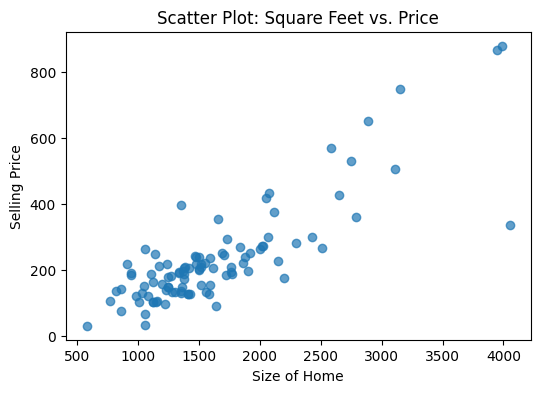

In [10]:
# Create a scatter plot between "size" and "price"
plt.figure(figsize=(6, 4))
plt.scatter(houses['size'], houses['price'], alpha=0.7)
plt.title('Scatter Plot: Square Feet vs. Price')
plt.xlabel('Size of Home')
plt.ylabel('Selling Price')

plt.show()

Part b. Find the correlation between the two variables.

In [11]:
# Calculate the correlation between "size" and "price"
correlation = houses['size'].corr(houses['price'])

print(f'Correlation between Entry and Time: {correlation}')

Correlation between Entry and Time: 0.8337847885586537


Part c. Find and plot the regression line on top of the scatterplot.

Slope (Coefficient): 0.18989116794379637
Intercept: -76.3893821074686


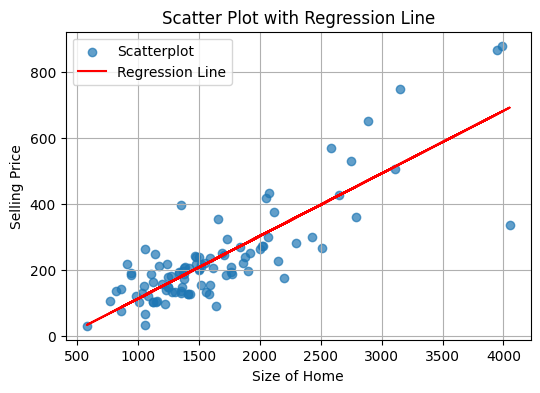

In [12]:
from sklearn.linear_model import LinearRegression

x = houses[['size']]
y = houses['price']

# Create a LinearRegression model
model = LinearRegression()

# Fit the model to the data
model.fit(x, y)

# Retrieve the coefficient (slope) and intercept of the linear regression
slope = model.coef_[0]
intercept = model.intercept_

# Print the regression results
print(f'Slope (Coefficient): {slope}')
print(f'Intercept: {intercept}')

# Plot the scatterplot
plt.figure(figsize=(6, 4))
plt.scatter(x, y, alpha=0.7, label='Scatterplot')

# Plot the regression line
plt.plot(x, model.predict(x), color='red', label='Regression Line')

plt.title('Scatter Plot with Regression Line')
plt.xlabel('Size of Home')
plt.ylabel('Selling Price')
plt.legend()
plt.grid(True)
plt.show()

Part d. Create a side by side boxplot of price comparing homes that are new and homes that are not new.

<Figure size 800x600 with 0 Axes>

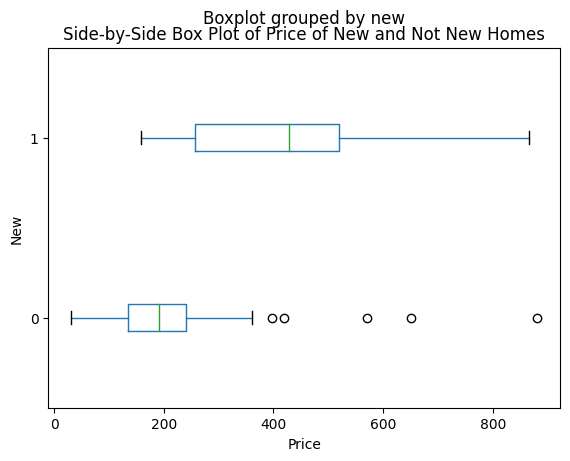

In [13]:
plt.figure(figsize=(8, 6))
houses.boxplot(column='price', by='new', vert=False,grid = False)
plt.title('Side-by-Side Box Plot of Price of New and Not New Homes')
plt.xlabel('Price')
plt.ylabel('New')
plt.show()

Part e. What is the relationship between size and price.  Justify your answer using the plots created. Do the same for the relationship between price and whether or not a house is new, again using the plot to justify your answer.

**Problem 1.22**. Using the Happy data file read in by the following code. Construct the contingency table relating marital status and happiness.

In [15]:
happy = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Happy.dat")

In [16]:
happy["marital"] = happy["marital"].replace({"fe": "female", "fem": "female", "mal": "male", "male": "male"})
pd.crosstab(happy["marital"],happy["happiness"])

happiness,1,1 1,1 2,1 3,2,2 1,2 2,2 3,3,3 1,3 2,3 3
marital,,,,,,,,,,,,
female,348,5,0,0,642,0,0,0,153,0,0,0
male,0,206,33,56,0,229,114,210,0,33,45,68
